## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Display the first few rows of the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Summary statistics
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


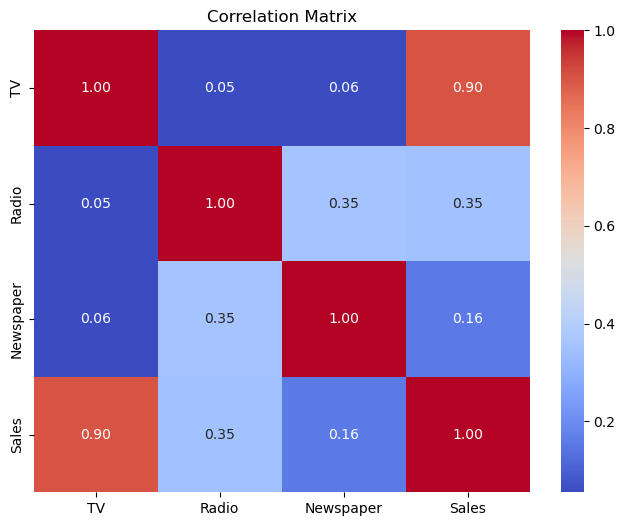

In [6]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

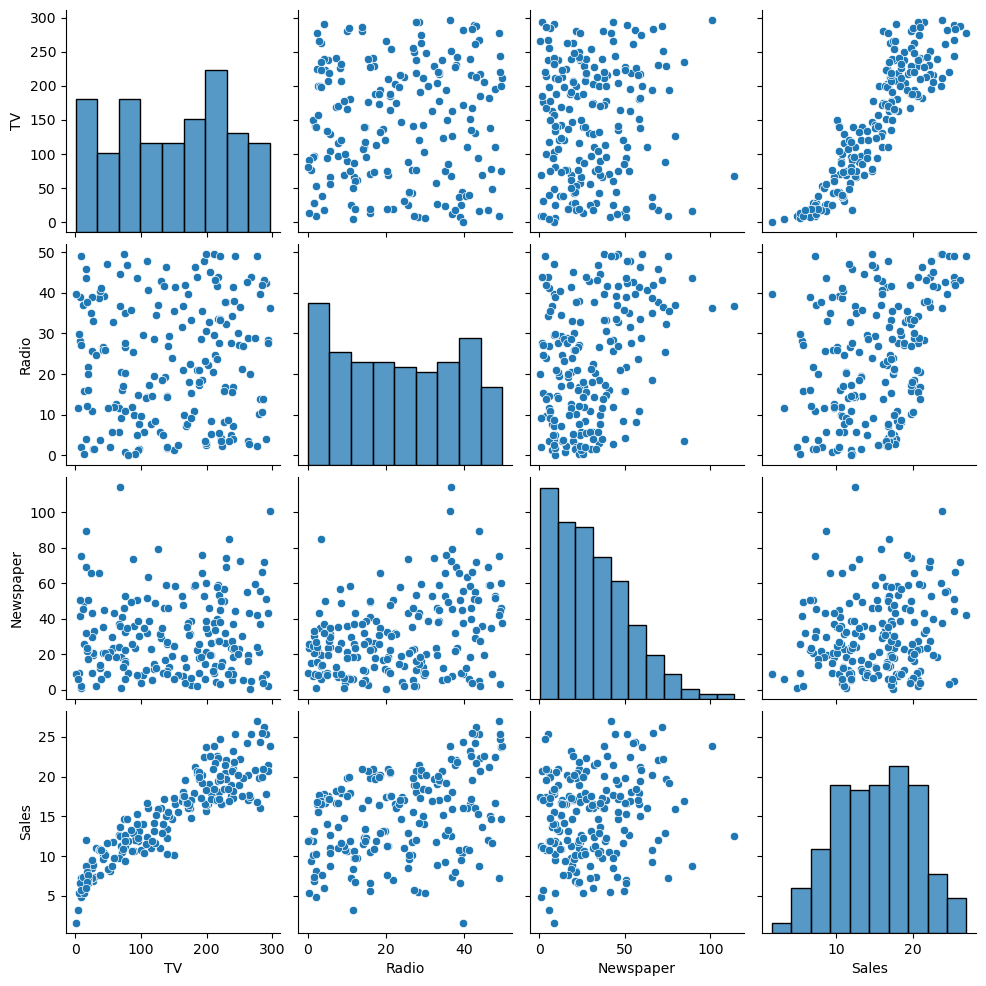

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

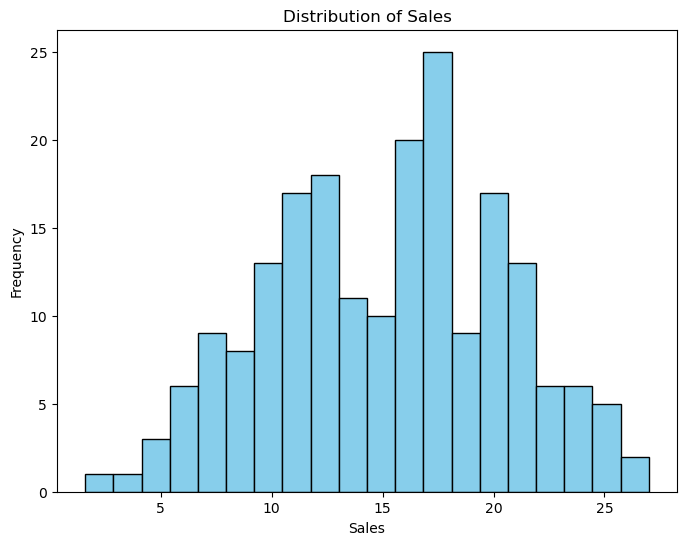

In [8]:
# Histogram for 'Sales'
plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


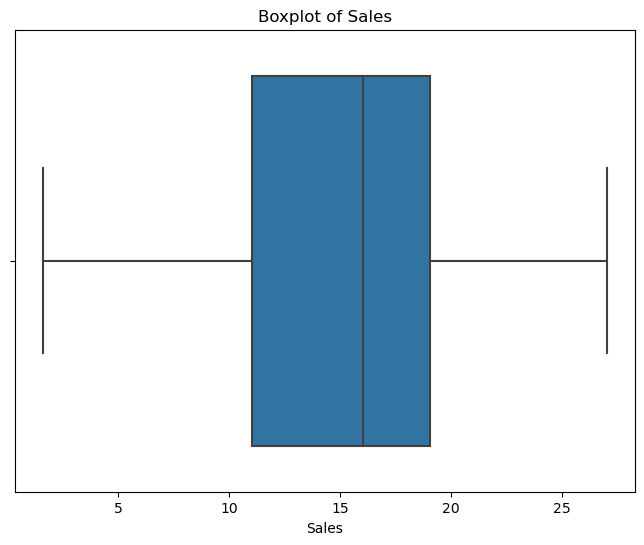

In [9]:
# Boxplot for 'Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales', data=df, orient='v')
plt.title('Boxplot of Sales')
plt.show()

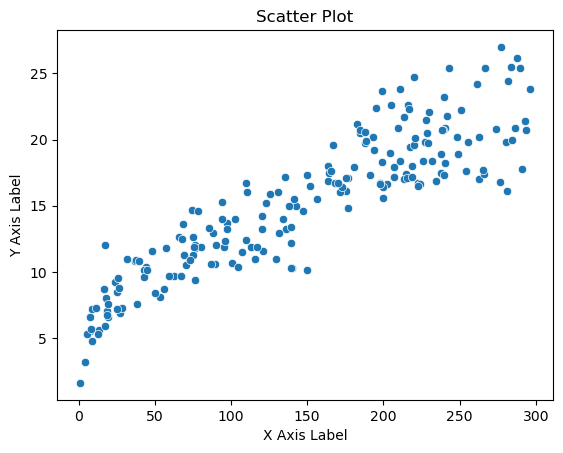

In [10]:
# Assuming 'x_data' and 'y_data' are your data arrays
sns.scatterplot(x=df["TV"], y=df['Sales'])
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Scatter Plot')
plt.show()

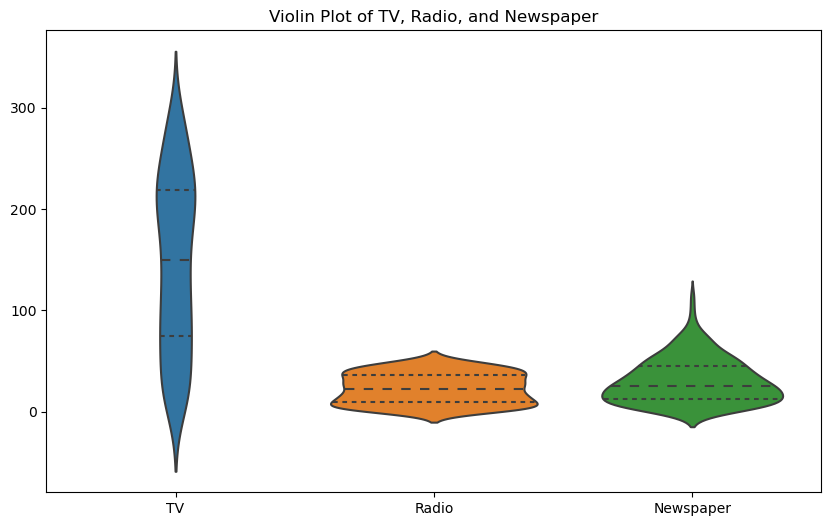

In [11]:
# Violin plot for 'TV', 'Radio', and 'Newspaper'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['TV', 'Radio', 'Newspaper']], inner="quartile")
plt.title('Violin Plot of TV, Radio, and Newspaper')
plt.show()

## Model Building 

In [12]:
# Split the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [14]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Model evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2.907756910271089
R^2 Score: 0.9059011844150826


## Random Forest Regressor

In [17]:
# Initialize and train the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Make predictions
rf_y_pred = rf_model.predict(X_test)

In [19]:
# Model evaluation
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_y_pred))
print("Random Forest R^2 Score:", r2_score(y_test, rf_y_pred))

Random Forest Mean Squared Error: 1.4374328500000009
Random Forest R^2 Score: 0.9534827934927883


## Gradient Boosting Regressor

In [20]:
# Initialize and train the Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [21]:
# Make predictions
gb_y_pred = gb_model.predict(X_test)

In [22]:
# Model evaluation
print("Gradient Boosting Mean Squared Error:", mean_squared_error(y_test, gb_y_pred))
print("Gradient Boosting R^2 Score:", r2_score(y_test, gb_y_pred))

Gradient Boosting Mean Squared Error: 1.255260979893099
Gradient Boosting R^2 Score: 0.9593781134039533


## Evaluation of Models

In [23]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Linear Regression Mean Squared Error:", mse_lr)
print("Linear Regression R^2 Score:", r2_lr)

Linear Regression Mean Squared Error: 2.907756910271089
Linear Regression R^2 Score: 0.9059011844150826


In [24]:
# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)

Random Forest Mean Squared Error: 1.4374328500000009
Random Forest R^2 Score: 0.9534827934927883


In [25]:
# Evaluate Gradient Boosting model
mse_gb = mean_squared_error(y_test, gb_y_pred)
r2_gb = r2_score(y_test, gb_y_pred)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R^2 Score:", r2_gb)

Gradient Boosting Mean Squared Error: 1.255260979893099
Gradient Boosting R^2 Score: 0.9593781134039533
